In [ ]:
import torch
from torchvision.datasets import CIFAR10
import torch.nn as nn 
import torch.nn.functional as F 
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchsummary import summary
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
# tfms=transforms.Compose([transforms.ToTensor()])
# train_data=CIFAR10(root='./data',train=True,transform=tfms,download=True)
# test_data=CIFAR10(root='./data',train=False,download=True,transform=tfms)

from matplotlib.transforms import Transform
transform=transforms.ToTensor()

### Data Loading
train_data=torchvision.datasets.FashionMNIST(root='./data',train=True,download=True,transform=transform)

test_data=torchvision.datasets.FashionMNIST(root='./data',train=False,download=True,transform=transform)


In [ ]:
batch_size=32
lr=.01
karnal_size=3
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=False)
test_loader=DataLoader(test_data,batch_size=batch_size,shuffle=False)

In [ ]:
trainiter=iter(train_loader)
images,labels=trainiter.next()
images.shape

torch.Size([32, 1, 28, 28])

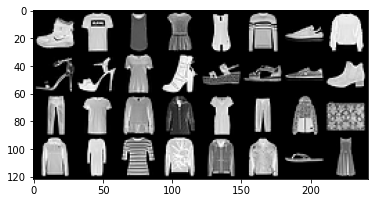

In [ ]:
plt.imshow((make_grid(images).numpy().transpose((1,2,0))))

In [ ]:
def conv_layer(in_channels,out_channels,kernel_size):

    return nn.Sequential(
        nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=kernel_size),
        nn.MaxPool2d(kernel_size=(2,2)),
        nn.ReLU()
    
        )

In [ ]:
class Conv_net(nn.Module):
    def __init__(self):
        super(Conv_net, self).__init__()
        self.layer1=conv_layer(3,16,3)
        self.layer2=conv_layer(16,32,3)
        self.layer3=conv_layer(32,64,3)
        self.flatten=nn.Flatten()
        self.fc1=nn.Linear(64*2*2,50)
        self.fc2=nn.Linear(50,10)
    def forward(self,x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=self.layer3(x)
        x=self.flatten(x)
        x=self.fc1(x)
        x=self.fc2(x)
        return x

In [ ]:
model=Conv_net()
model

Conv_net(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=256, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [ ]:
summary(model=model,input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             448
         MaxPool2d-2           [-1, 16, 15, 15]               0
              ReLU-3           [-1, 16, 15, 15]               0
            Conv2d-4           [-1, 32, 13, 13]           4,640
         MaxPool2d-5             [-1, 32, 6, 6]               0
              ReLU-6             [-1, 32, 6, 6]               0
            Conv2d-7             [-1, 64, 4, 4]          18,496
         MaxPool2d-8             [-1, 64, 2, 2]               0
              ReLU-9             [-1, 64, 2, 2]               0
          Flatten-10                  [-1, 256]               0
           Linear-11                   [-1, 50]          12,850
           Linear-12                   [-1, 10]             510
Total params: 36,944
Trainable params: 36,944
Non-trainable params: 0
---------------------------------

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=lr)

In [ ]:
def train(mode,trainloader,loss_fn=None,optimizer=None,seed=32,EPOCHS=100):
    torch.manual_seed(seed)
    cost=[]
    
    model.to(device)
    for epoch in range(EPOCHS):
        train_corr=[]
        for idx,(img,lbl) in enumerate(trainloader):
            ##1 Compute the Output
            img,lbl=img.to(device),lbl.to(device)
            yhat=model(img)
            
            ##2 Compute the Loss
            loss=loss_fn(yhat,lbl)

            ##3 Compute the gradients
            optimizer.zero_grad()
            loss.backward()

            ##4 update the model parameters
            optimizer.step()
            with torch.no_grad():
                yhat=model(img)
                loss=loss_fn(yhat,lbl)
                core_lbl=(torch.argmax(F.softmax(yhat,dim=1),dim=1)==lbl).sum().item()
                ##print('Model accuracy on this batch %.2f', core_lbl)
                train_corr.append(core_lbl)
        with torch.no_grad():
            acc=sum(train_corr)/len(train_data)*100
            
            print(f'After {epoch+1} Model Training Accuracy {acc}')


   


In [ ]:
len(train_data)

60000

In [ ]:
model=Conv_net()
cost=train(mode=model,trainloader=train_loader,loss_fn=loss_fn,optimizer=optimizer,EPOCHS=10)

RuntimeError: ignored